# load data

In [1]:
use CRIME4.dta, clear

In [2]:
describe


Contains data from CRIME4.dta
  obs:           630                          
 vars:            59                          17 Aug 1999 13:52
 size:       128,520                          
--------------------------------------------------------------------------------
              storage   display    value
variable name   type    format     label      variable label
--------------------------------------------------------------------------------
county          int     %9.0g                 county identifier
year            byte    %9.0g                 81 to 87
crmrte          float   %9.0g                 crimes committed per person
prbarr          float   %9.0g                 'probability' of arrest
prbconv         float   %9.0g                 'probability' of conviction
prbpris         float   %9.0g                 'probability' of prison sentenc
avgsen          float   %9.0g                 avg. sentence, days
polpc           float   %9.0g                 police per capita
de

In [3]:
ds

county    density   wtrd      pctymle   lprbarr   lwtuc     lmix      clpolpc
year      taxpc     wfir      d82       lprbconv  lwtrd     lpctymle  cltaxpc
crmrte    west      wser      d83       lprbpris  lwfir     lpctmin   clmix
prbarr    central   wmfg      d84       lavgsen   lwser     clcrmrte
prbconv   urban     wfed      d85       lpolpc    lwmfg     clprbarr
prbpris   pctmin80  wsta      d86       ldensity  lwfed     clprbcon
avgsen    wcon      wloc      d87       ltaxpc    lwsta     clprbpri
polpc     wtuc      mix       lcrmrte   lwcon     lwloc     clavgsen


# keep observations before 1984

In [4]:
keep if year <=84

(270 observations deleted)


(bin=18, start=81, width=.16666667)


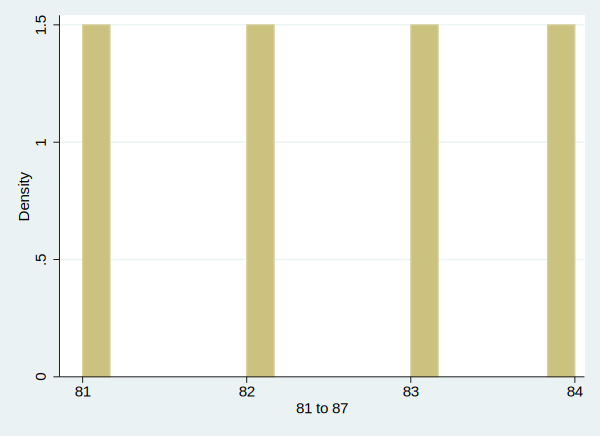

In [5]:
hist year

# keep observations after 1984



       panel variable:  county (strongly balanced)
        time variable:  year, 81 to 87
                delta:  1 unit

(270 observations deleted)

(bin=18, start=84, width=.16666667)


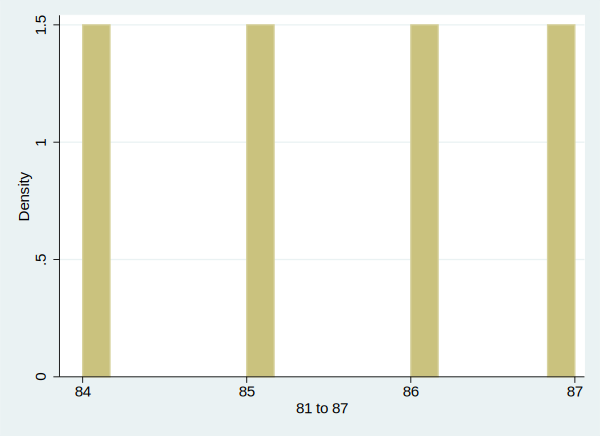

In [6]:
use CRIME4.dta, clear

xtset county year

keep if year >=84

hist year

# (c) POLS

In [7]:
reg lcrmrte lprbarr lprbconv lprbpris lavgsen lpolpc ldensity

estimate store POLS



      Source |       SS           df       MS      Number of obs   =       360
-------------+----------------------------------   F(6, 353)       =     99.34
       Model |  77.6899435         6  12.9483239   Prob > F        =    0.0000
    Residual |  46.0116355       353  .130344576   R-squared       =    0.6280
-------------+----------------------------------   Adj R-squared   =    0.6217
       Total |  123.701579       359  .344572643   Root MSE        =    .36103

------------------------------------------------------------------------------
     lcrmrte |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
     lprbarr |  -.5334847    .054792    -9.74   0.000    -.6412445   -.4257249
    lprbconv |  -.4028035   .0365869   -11.01   0.000    -.4747593   -.3308477
    lprbpris |   .0379085   .0897225     0.42   0.673    -.1385494    .2143665
     lavgsen |  -.0715123    .073233    -0.98   0

# (c) FE

In [8]:
xtreg lcrmrte lprbarr lprbconv lprbpris lavgsen lpolpc ldensity, fe

estimate store FE



Fixed-effects (within) regression               Number of obs     =        360
Group variable: county                          Number of groups  =         90

R-sq:                                           Obs per group:
     within  = 0.4125                                         min =          4
     between = 0.5307                                         avg =        4.0
     overall = 0.5099                                         max =          4

                                                F(6,264)          =      30.89
corr(u_i, Xb)  = -0.9225                        Prob > F          =     0.0000

------------------------------------------------------------------------------
     lcrmrte |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
     lprbarr |  -.3288423   .0455337    -7.22   0.000    -.4184978   -.2391868
    lprbconv |  -.2702464   .0287394    -9.40   0.000    -.3268

# (c) RE

In [9]:
xtreg lcrmrte lprbarr lprbconv lprbpris lavgsen lpolpc ldensity, re

estimate store RE



Random-effects GLS regression                   Number of obs     =        360
Group variable: county                          Number of groups  =         90

R-sq:                                           Obs per group:
     within  = 0.3924                                         min =          4
     between = 0.6114                                         avg =        4.0
     overall = 0.5970                                         max =          4

                                                Wald chi2(6)      =     318.34
corr(u_i, X)   = 0 (assumed)                    Prob > chi2       =     0.0000

------------------------------------------------------------------------------
     lcrmrte |      Coef.   Std. Err.      z    P>|z|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
     lprbarr |  -.3767105    .042788    -8.80   0.000    -.4605735   -.2928475
    lprbconv |  -.2964253   .0272023   -10.90   0.000    -.3497

# (c) FD

In [10]:
reg D.lcrmrte D.lprbarr D.lprbcon D.lprbpri D.lavgsen D.lpolpc D.ldensity

estimate store FD



      Source |       SS           df       MS      Number of obs   =       270
-------------+----------------------------------   F(6, 263)       =     31.81
       Model |  5.43997841         6  .906663068   Prob > F        =    0.0000
    Residual |  7.49670191       263   .02850457   R-squared       =    0.4205
-------------+----------------------------------   Adj R-squared   =    0.4073
       Total |  12.9366803       269  .048091748   Root MSE        =    .16883

------------------------------------------------------------------------------
   D.lcrmrte |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
     lprbarr |
         D1. |  -.3495713   .0448818    -7.79   0.000    -.4379446   -.2611981
             |
    lprbconv |
         D1. |   -.271996   .0265345   -10.25   0.000     -.324243    -.219749
             |
    lprbpris |
         D1. |  -.1827888    .040141    -4.55   0.000

# (c) comparison table

In [11]:
estout POLS FD FE RE, cells(b(star fmt(3)) se(par fmt(3))) stats(r2 r2_a F chi2 N, labels(R2 adj-R2 F-value Chi2-value "sample size")) legend


----------------------------------------------------------------------------
                     POLS              FD              FE              RE   
                     b/se            b/se            b/se            b/se   
----------------------------------------------------------------------------
lprbarr            -0.533***                       -0.329***       -0.377***
                  (0.055)                         (0.046)         (0.043)   
lprbconv           -0.403***                       -0.270***       -0.296***
                  (0.037)                         (0.029)         (0.027)   
lprbpris            0.038                          -0.198***       -0.223***
                  (0.090)                         (0.045)         (0.044)   
lavgsen            -0.072                          -0.052          -0.032   
                  (0.073)                         (0.037)         (0.037)   
lpolpc              0.323***                        0.391***        0.378**

# (d) test FE vs RE

In [12]:
hausman FE RE


                 ---- Coefficients ----
             |      (b)          (B)            (b-B)     sqrt(diag(V_b-V_B))
             |       FE           RE         Difference          S.E.
-------------+----------------------------------------------------------------
     lprbarr |   -.3288423    -.3767105        .0478682        .0155726
    lprbconv |   -.2702464    -.2964253         .026179        .0092729
    lprbpris |   -.1984727    -.2232842        .0248115        .0094008
     lavgsen |   -.0519957    -.0324455       -.0195502        .0061552
      lpolpc |    .3909318     .3781739        .0127579        .0132809
    ldensity |    1.578019     .3412343        1.236784        .4338602
------------------------------------------------------------------------------
                           b = consistent under Ho and Ha; obtained from xtreg
            B = inconsistent under Ha, efficient under Ho; obtained from xtreg

    Test:  Ho:  difference in coefficients not systematic

   

# (f) IV regression for FD (aka why linear modelling typically sucks in real life)

## * R-squared is invalid (aka not computable), meaning this model has no prediction power
## * none variable is significant 

In [13]:
ivregress 2sls D.lcrmrte D.lprbarr D.lprbconv D.lprbpris D.lavgsen D.ldensity (D.lpolpc = D.ltaxpc)

estimate store IV



Instrumental variables (2SLS) regression          Number of obs   =        270
                                                  Wald chi2(6)    =      21.97
                                                  Prob > chi2     =     0.0012
                                                  R-squared       =          .
                                                  Root MSE        =     .31596

------------------------------------------------------------------------------
   D.lcrmrte |      Coef.   Std. Err.      z    P>|z|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
      lpolpc |
         D1. |   -.586611   1.837526    -0.32   0.750    -4.188097    3.014875
             |
     lprbarr |
         D1. |  -.2189772    .255717    -0.86   0.392    -.7201735     .282219
             |
    lprbconv |
         D1. |   .0070008   .5183779     0.01   0.989    -1.009001    1.023003
             |
    lprbpris |
         D1. |  -.13593

# Hausman test for endogeneity

In [14]:
estat endogenous


  Tests of endogeneity
  Ho: variables are exogenous

  Durbin (score) chi2(1)          =  1.05118  (p = 0.3052)
  Wu-Hausman F(1,262)             =  1.02402  (p = 0.3125)


# compare IV model with FD

In [15]:
estout FD IV, cells(b(star fmt(3)) se(par fmt(3))) stats(r2 r2_a F chi2 N, labels(R2 adj-R2 F-value Chi2-value "sample size")) legend


--------------------------------------------
                       FD              IV   
                     b/se            b/se   
--------------------------------------------
D.lprbarr          -0.350***       -0.219   
                  (0.045)         (0.256)   
D.lprbconv         -0.272***        0.007   
                  (0.027)         (0.518)   
D.lprbpris         -0.183***       -0.136   
                  (0.040)         (0.115)   
D.lavgsen          -0.067          -0.217   
                  (0.036)         (0.287)   
D.lpolpc            0.406***       -0.587   
                  (0.038)         (1.838)   
D.ldensity          0.508          -2.227   
                  (0.806)         (5.278)   
_cons               0.024           0.072   
                  (0.014)         (0.093)   
--------------------------------------------
R2                  0.421               .   
adj-R2              0.407               .   
F-value            31.808                   
Chi2-valu

# (g) first stage of 2SLS

In [16]:
reg D.lpolpc D.lprbarr D.lprbconv D.lprbpris D.lavgsen D.ltaxpc D.ldensity


      Source |       SS           df       MS      Number of obs   =       270
-------------+----------------------------------   F(6, 263)       =     12.22
       Model |  5.49610055         6  .916016758   Prob > F        =    0.0000
    Residual |  19.7118373       263  .074949952   R-squared       =    0.2180
-------------+----------------------------------   Adj R-squared   =    0.2002
       Total |  25.2079378       269  .093709806   Root MSE        =    .27377

------------------------------------------------------------------------------
    D.lpolpc |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
     lprbarr |
         D1. |    .134998   .0725341     1.86   0.064    -.0078234    .2778194
             |
    lprbconv |
         D1. |   .2824931   .0394586     7.16   0.000     .2047981    .3601881
             |
    lprbpris |
         D1. |   .0483571   .0650516     0.74   0.458 

# transform codes to HTML

In [17]:
!rm -rf A2_Stata.html
!jupyter nbconvert --to html A2_Stata.ipynb





[NbConvertApp] Converting notebook A2_Stata.ipynb to html
[NbConvertApp] Writing 625306 bytes to A2_Stata.html
